In [23]:
import numpy as np
import json


class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)


In [2]:
def circ_points(r, n_points):
    
    n_samps = 1000
    interval = np.int(np.floor(n_samps/n_points))
    samps = np.mod(np.arange(n_samps)+np.random.randint(n_samps),n_samps)[::interval]
    samps = samps[:n_points]
    
    th = np.linspace(0,2*np.pi,n_samps)
    x = r*np.cos(th)
    y = r*np.sin(th)
    
    return x[samps], y[samps]

In [19]:
n_tt = 16
n_points = [1,4,8,3]
n_radii = 4
scale = 300
radii = np.arange(n_radii)*scale
tt_centers = np.zeros((n_tt,2))

x_points = []
y_points = []
idx_e = np.cumsum(np.array(n_points)).astype(int)
idx_s = np.concatenate((np.zeros(1),idx_e[:-1])).astype(int)
for ii,r in enumerate(radii):
    x,y = circ_points(r,n_points[ii])
    tt_centers[idx_s[ii]:idx_e[ii],0] = x
    tt_centers[idx_s[ii]:idx_e[ii],1] = y
    
chan_locs = {}
for tt in range(n_tt):
    x,y = circ_points(scale*0.1,4)
    x+=tt_centers[tt][0]
    y+=tt_centers[tt][1]
    z=np.stack((x,y)).T
    chan_locs[tt] = [ list(xy.astype(int)) for xy in z]
    


In [28]:
channel_groups = {}
for tt in range(n_tt):
    channels = np.arange(4,dtype=int)+4*tt
    channel_groups[tt] = {'channels':[],'label':[],'geometry':[]}
    channel_groups[tt]['channels'] = list(channels)
    channel_groups[tt]['label'] = ['ch_{}'.format(ch) for ch in channels]
    channel_groups[tt]['geometry'] = chan_locs[tt]
    
    
with open('tetrode_16.prb','w') as f:
    json.dump(channel_groups,f,indent=4, cls=NpEncoder)
             
print(channel_groups)

{0: {'channels': [0, 1, 2, 3], 'label': ['ch_0', 'ch_1', 'ch_2', 'ch_3'], 'geometry': [[4, 29], [-29, 4], [-4, -29], [29, -4]]}, 1: {'channels': [4, 5, 6, 7], 'label': ['ch_4', 'ch_5', 'ch_6', 'ch_7'], 'geometry': [[250, 209], [210, 194], [225, 155], [265, 170]]}, 2: {'channels': [8, 9, 10, 11], 'label': ['ch_8', 'ch_9', 'ch_10', 'ch_11'], 'geometry': [[-175, 266], [-212, 244], [-189, 208], [-153, 230]]}, 3: {'channels': [12, 13, 14, 15], 'label': ['ch_12', 'ch_13', 'ch_14', 'ch_15'], 'geometry': [[-267, -186], [-233, -213], [-207, -179], [-240, -153]]}, 4: {'channels': [16, 17, 18, 19], 'label': ['ch_16', 'ch_17', 'ch_18', 'ch_19'], 'geometry': [[213, -231], [177, -207], [154, -243], [189, -266]]}, 5: {'channels': [20, 21, 22, 23], 'label': ['ch_20', 'ch_21', 'ch_22', 'ch_23'], 'geometry': [[-306, 531], [-348, 521], [-338, 480], [-297, 490]]}, 6: {'channels': [24, 25, 26, 27], 'label': ['ch_24', 'ch_25', 'ch_26', 'ch_27'], 'geometry': [[-593, 100], [-557, 121], [-577, 158], [-614, 137

In [22]:
channel_groups

{'0': {'channels': [0, 1, 2, 3],
  'label': ['ch_0', 'ch_1', 'ch_2', 'ch_3'],
  'geometry': [[4, 29], [-29, 4], [-4, -29], [29, -4]]},
 '1': {'channels': [4, 5, 6, 7],
  'label': ['ch_4', 'ch_5', 'ch_6', 'ch_7'],
  'geometry': [[250, 209], [210, 194], [225, 155], [265, 170]]},
 '2': {'channels': [8, 9, 10, 11],
  'label': ['ch_8', 'ch_9', 'ch_10', 'ch_11'],
  'geometry': [[-175, 266], [-212, 244], [-189, 208], [-153, 230]]},
 '3': {'channels': [12, 13, 14, 15],
  'label': ['ch_12', 'ch_13', 'ch_14', 'ch_15'],
  'geometry': [[-267, -186], [-233, -213], [-207, -179], [-240, -153]]},
 '4': {'channels': [16, 17, 18, 19],
  'label': ['ch_16', 'ch_17', 'ch_18', 'ch_19'],
  'geometry': [[213, -231], [177, -207], [154, -243], [189, -266]]},
 '5': {'channels': [20, 21, 22, 23],
  'label': ['ch_20', 'ch_21', 'ch_22', 'ch_23'],
  'geometry': [[-306, 531], [-348, 521], [-338, 480], [-297, 490]]},
 '6': {'channels': [24, 25, 26, 27],
  'label': ['ch_24', 'ch_25', 'ch_26', 'ch_27'],
  'geometry': [[

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

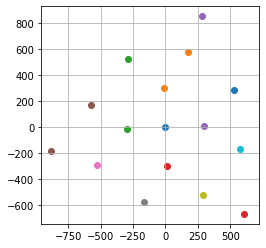

In [12]:
for tt in range(n_tt):
    plt.scatter(*tt_centers[tt])
plt.axis('square')
plt.grid()

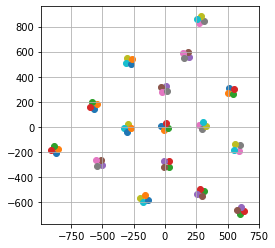

In [14]:
for tt in range(n_tt):
    for xy in chan_locs[tt]:
        plt.scatter(*xy)
plt.axis('square')
plt.grid()